In [1]:
from src import scLENS_py
sclens = scLENS_py.scLENS_py()

/home/khyeonmin/micromamba/envs/scLENS-py/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## data

### csv file

In [ ]:
import pandas as pd
import scanpy as sc

df = pd.read_csv("")
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### anndata

In [ ]:
import scanpy as sc
adata = sc.read_h5ad("")

## directory setting

In [4]:
import os
import shutil

file_name = "test"

directory = f"./output/{file_name}"
sclens.directory = directory

## execution

### In the preprocess stage, if filter is set to False, filtering is performed using Scanpy.

In [ ]:
# import scanpy as sc

# adata.var['mt'] = adata.var_names.str.startswith('MT-')
# sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=True, inplace=False)

# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=15)

After filtering >> shape: (529, 452)
plotting the result of preprocessing


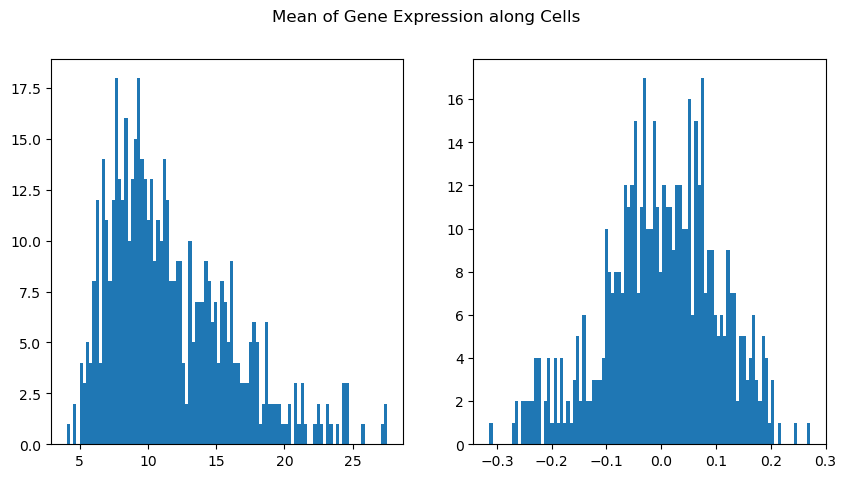

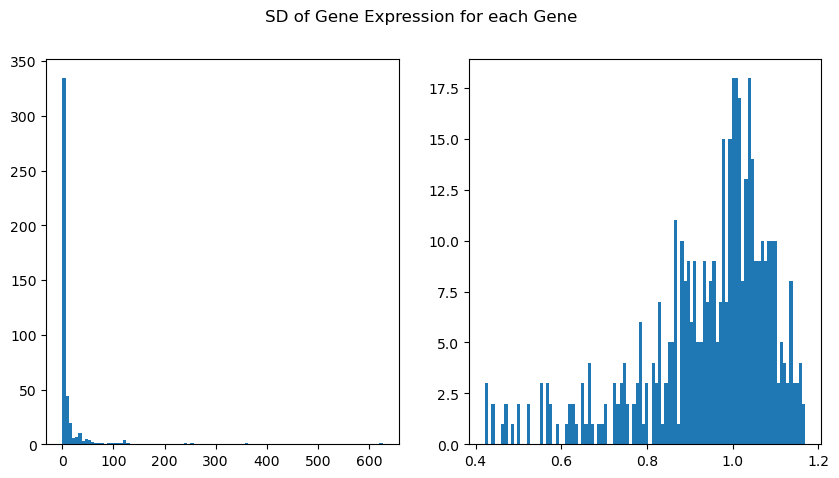

CPU times: user 14.8 ms, sys: 23.7 ms, total: 38.5 ms
Wall time: 4.52 s


In [5]:
%%time
sclens.preprocess(adata, filter=True, plot=True)

In [6]:
%%time
sclens.fit_transform(device = 'gpu', plot_mp = False)

sparsity_th: 0.1509514559026635
Min(corr): 0.29662877321243286, sparsity: 0.999
Min(corr): 0.2569909393787384, sparsity: 0.998
Min(corr): 0.23123256862163544, sparsity: 0.997
Min(corr): 0.2107025533914566, sparsity: 0.996
Min(corr): 0.21071931719779968, sparsity: 0.995
Min(corr): 0.20153596997261047, sparsity: 0.994
Min(corr): 0.1918140947818756, sparsity: 0.993
Min(corr): 0.19521564245224, sparsity: 0.992
Min(corr): 0.18700259923934937, sparsity: 0.991
Min(corr): 0.18056590855121613, sparsity: 0.99
Min(corr): 0.17719149589538574, sparsity: 0.989
Min(corr): 0.17597156763076782, sparsity: 0.988
Min(corr): 0.17685028910636902, sparsity: 0.987
Min(corr): 0.17191281914710999, sparsity: 0.986
Min(corr): 0.17247647047042847, sparsity: 0.985
Min(corr): 0.17139340937137604, sparsity: 0.984
Min(corr): 0.17353367805480957, sparsity: 0.983
Min(corr): 0.1702938675880432, sparsity: 0.982
Min(corr): 0.15982820093631744, sparsity: 0.981
Min(corr): 0.16539470851421356, sparsity: 0.98
Min(corr): 0.1586

100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


CPU times: user 1min 49s, sys: 4.79 s, total: 1min 54s
Wall time: 1min 15s


array([[ 0.05305998, -0.06329257, -0.26500455, ..., -0.13598247,
         0.13977186,  0.22024248],
       [-0.02892696, -0.04061029, -0.25785159, ..., -0.13645899,
         0.14971321,  0.24538552],
       [-0.03073738, -0.04497677, -0.0439507 , ..., -0.14388086,
         0.49350749, -0.43852693],
       ...,
       [ 0.11450852, -0.07953336,  0.06737334, ..., -0.01258987,
         0.06698518,  0.155619  ],
       [ 0.05106805,  0.08356992, -0.04398781, ..., -0.12617633,
        -0.27159872, -0.30877154],
       [ 0.04075696, -0.08082373, -0.08120669, ..., -0.1227511 ,
        -0.31595654, -0.07768378]], shape=(529, 20))

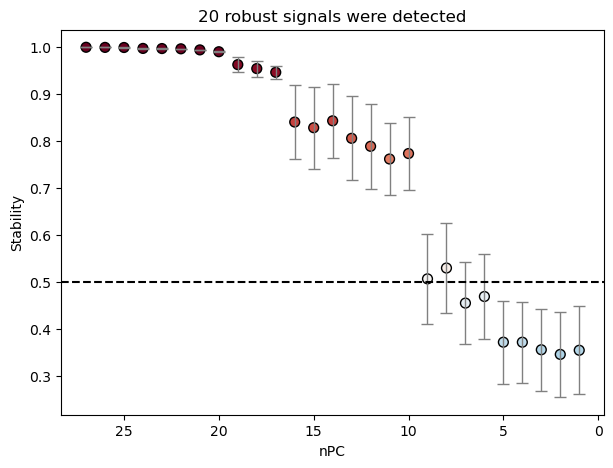

In [7]:
sclens.plot_robust_score()